In [275]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Reading csv File

In [276]:
df = pd.read_csv('..\\Datasets\\placement.csv')
df.sample()

,cgpa,package
112,8.58,4.1


# Scatter plot to see the linear nature of given data

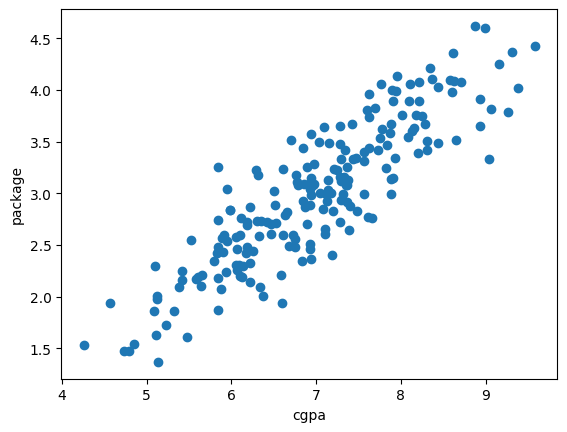

In [277]:
plt.scatter(x=df['cgpa'], y=df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

# Slicing for feature; dataframe, and selecting for label; series

In [278]:
X = df.iloc[:,0:1]    # fit method demands Feature to be dataframe even if it contains only one column
y = df.iloc[:,1]
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Selection returns Series

In [279]:
# X = df['cgpa']
# y = df['package']
# print(type(X))
# print(type(y))

# Train test split

In [280]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)
type(X_train)

pandas.core.frame.DataFrame

# Simple LR model training and prediction

In [281]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)     # predict method returns a numpy array
print(pd.Series.to_numpy(y_test))     # Series to numpy array
print(y_pred)
print(pd.DataFrame.to_numpy(X_test))

[4.1  3.49 2.08 2.33 1.94 1.48 1.86 3.09 4.21 2.87 3.65 4.   2.89 2.6
 2.99 3.25 1.86 3.67 2.37 3.42 2.48 3.65 2.6  2.83 4.08 2.56 3.58 3.81
 4.09 2.01 3.63 2.92 3.51 1.94 2.21 3.34 3.34 3.23 2.01 2.61]
[3.89111601 3.09324469 2.38464568 2.57434935 1.6537286  1.77647803
 2.07219258 2.93143862 3.76278706 2.93701814 4.09197872 3.51170867
 2.97049525 2.40138424 3.18809652 3.46707251 1.94386362 3.24389172
 2.97607477 3.41685683 2.55761079 3.16577844 2.85890486 3.12114229
 3.68467378 2.8700639  3.49497011 3.34432308 3.91901361 1.96060218
 3.65119666 3.2104146  3.74046898 2.7863711  2.78079158 3.27178932
 3.52844723 2.61340599 2.65804215 2.71383735]
[[8.58]
 [7.15]
 [5.88]
 [6.22]
 [4.57]
 [4.79]
 [5.32]
 [6.86]
 [8.35]
 [6.87]
 [8.94]
 [7.9 ]
 [6.93]
 [5.91]
 [7.32]
 [7.82]
 [5.09]
 [7.42]
 [6.94]
 [7.73]
 [6.19]
 [7.28]
 [6.73]
 [7.2 ]
 [8.21]
 [6.75]
 [7.87]
 [7.6 ]
 [8.63]
 [5.12]
 [8.15]
 [7.36]
 [8.31]
 [6.6 ]
 [6.59]
 [7.47]
 [7.93]
 [6.29]
 [6.37]
 [6.47]]


# Predicting individual values

In [282]:
print(X_test.iloc[0])   # selection returns Series  
print(type(X_test.iloc[0]))

print(X_test.iloc[0].values)    # returns a numpy array
print(type(X_test.iloc[0].values))

print(X_test.iloc[0:5])   # slicing returns dataframe
print(type(X_test.iloc[0:5]))

print(X_test.iloc[0:5].values)    # returns a numpy array
print(type(X_test.iloc[0:5].values))


cgpa    8.58
Name: 112, dtype: float64
<class 'pandas.core.series.Series'>
[8.58]
<class 'numpy.ndarray'>
     cgpa
112  8.58
29   7.15
182  5.88
199  6.22
193  4.57
<class 'pandas.core.frame.DataFrame'>
[[8.58]
 [7.15]
 [5.88]
 [6.22]
 [4.57]]
<class 'numpy.ndarray'>


In [283]:
lr.predict(X_test.iloc[1].values.reshape(1,1))    # predict method demands a dataframe
# lr.predict(X_test.iloc[[1]].values)
(lr.predict([[8.58]]))

C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

# Best fit line

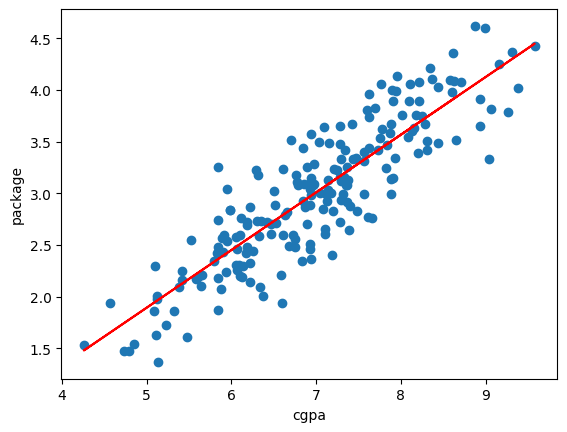

In [284]:
plt.scatter(df['cgpa'], df['package'])
# plt.scatter(X_train, lr.predict(X_train), color ='red')
plt.plot(X_train, lr.predict(X_train), color ='red')
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

# Values m & b

In [285]:
m = lr.coef_
b = lr.intercept_
m,b

(array([0.55795197]), -0.8961119222429144)

# Manual calculation

In [286]:
# y=mx+b
m * 8.58 + b

array([3.89111601])